<a href="https://colab.research.google.com/github/xprilion/weave-101/blob/main/openai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!uv pip install weave
!uv pip install openai

In [2]:
import os
from google.colab import userdata

In [14]:
import weave
from openai import OpenAI
import requests
import base64
from io import BytesIO
from PIL import Image
from IPython.display import Image

In [7]:
os.environ["WANDB_API_KEY"]=userdata.get("WANDB_API_KEY")
os.environ["OPENAI_API_KEY"]=userdata.get("OPENAI_TEMP_KEY")

In [8]:
weave.init('ai-converge-blr-may-2025')
client = OpenAI()

### Implicit Tracing

In [9]:
response = client.responses.create(
    model="gpt-4o",
    instructions="You are a coding assistant that talks like a pirate.",
    input="How do I check if a Python object is an instance of a class?",
)

weave: 🍩 https://wandb.ai/wandb/ai-converge-blr-may-2025/r/call/019724d1-d2c2-77e3-838e-028705bef9b0


In [10]:
print(response.output_text)

Ahoy, matey! To check if a Python object is an instance of a class, ye can use the `isinstance` function. Here be the code ye need:

```python
if isinstance(swashbuckler, Pirate):
    print("Aye, it be a Pirate!")
else:
    print("Nay, it be not a Pirate!")
```

Replace `swashbuckler` with yer object, and `Pirate` with the class ye be checkin' against. Arrr!


In [11]:
@weave.op
def generate_image(prompt: str) -> Image:
    result = client.images.generate(
        model="gpt-image-1",
        prompt=prompt
    )

    image_base64 = result.data[0].b64_json
    image_bytes = base64.b64decode(image_base64)

    # return a PIL.Image.Image object to be logged as an image
    return image_bytes

In [12]:
prompt = """
A children's book drawing of a veterinarian using a stethoscope to
listen to the heartbeat of a baby otter.
"""

In [13]:
res = generate_image(prompt)

weave: 🍩 https://wandb.ai/wandb/ai-converge-blr-may-2025/r/call/019724d1-fd6b-7272-9131-93af27cbbdb2


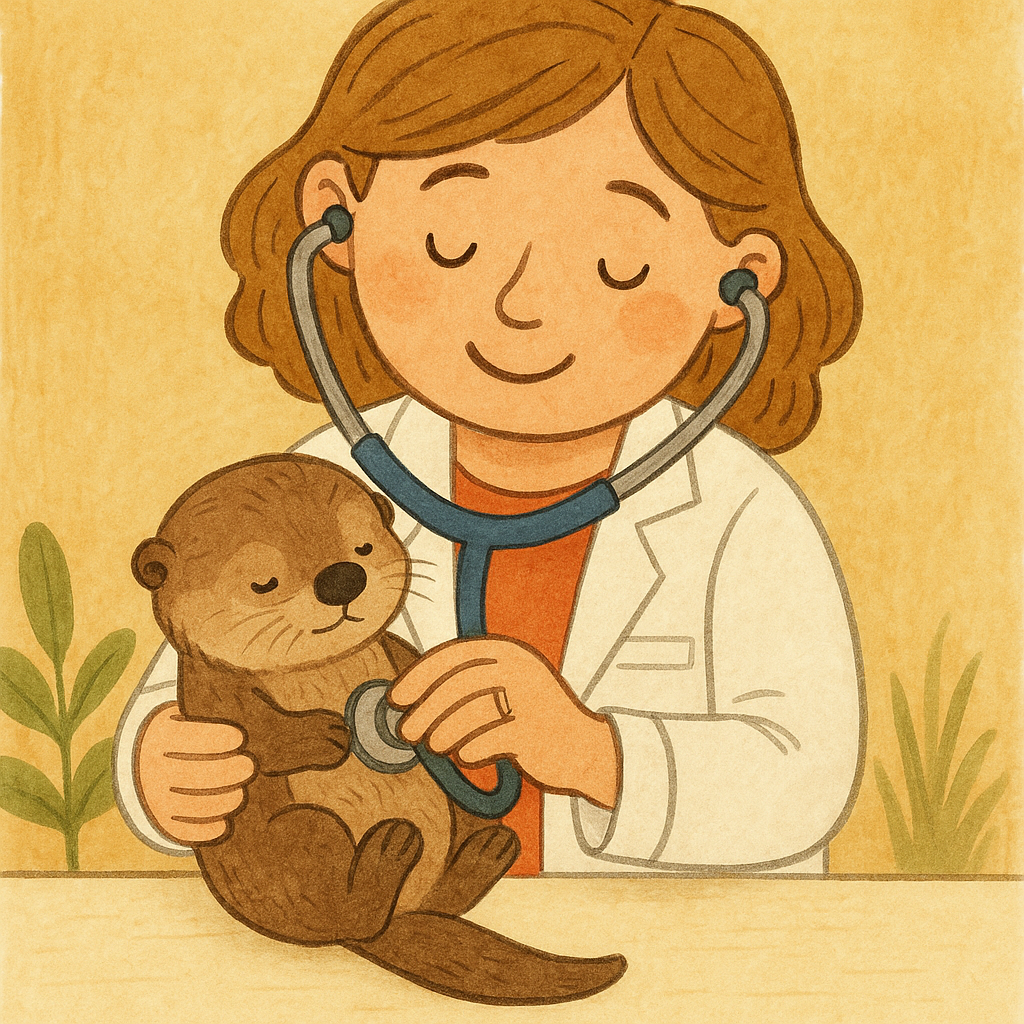

In [15]:
Image(res)